In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import collections
from IPython.display import display
import matplotlib.pyplot as plt

COUNT = 1
DISTANCE_WEIGHTED = 2

In [2]:
wine = pd.read_csv("winequality-red.csv")
wine_X = wine.iloc[:, 0:(wine.shape[1] - 1)]
wine_X_norm = (wine_X - wine_X.mean()) / (wine_X.max() - wine_X.min())

In [4]:
X = np.array(wine_X)
y = np.array(wine["class"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
def euclidian_distance(A, B):
    if not (A.ndim == 1 and B.ndim == 1):
        raise ValueError("Both numpy arrays should be single rows (1 dimensional).")
    return np.sqrt(np.sum(np.square(A - B)))

In [4]:
def predict(train_X, labels, test, K, metric):
    distances = []
    for i, sample in enumerate(train_X):
        distance = euclidian_distance(sample, test)
        distances.append((distance, i))

    distances.sort()

    return predict_label(distances, labels, K, metric)

In [5]:
def predict_label(distances, labels, K, metric):
    if metric == COUNT:
        k_closest = [labels[x[1]] for x in distances[:K]]
        counts = collections.Counter(k_closest)
        return counts.most_common()[0][0], counts.most_common()[0][1] / K
    if metric == DISTANCE_WEIGHTED:
        label_sum = {}
        max_sum = -1
        count = 0
        for distance, index in distances:
            if distance == 0: continue
            if count == K: break
            count += 1
            label_sum[labels[index]] = label_sum.get(labels[index], 0) + (1 / distance)
            if label_sum[labels[index]] > max_sum:
                max_sum = label_sum[labels[index]]
                predicted_label = labels[index]
        return predicted_label, max_sum / sum(label_sum.values())

In [6]:
def kNN(X_train, y_train, X_test, y_test, K, metric):
    predicted = []
    for i, test in enumerate(X_test):
        predicted_class, posterior = predict(X_train, y_train, test, K, metric)
        actual_class = y_test[i]
        predicted.append((actual_class, predicted_class, posterior))
    
    prediction = pd.DataFrame.from_records(predicted, columns=["Actual", "Predicted", "Posterior"])
    
    return prediction

In [7]:
def get_accuracy(prediction_df):
    return prediction_df[prediction_df["Actual"] == prediction_df["Predicted"]].shape[0] / prediction_df.shape[0]

In [10]:
get_accuracy(kNN(X_train, y_train, X_test, y_test, 24, DISTANCE_WEIGHTED))

0.6275

In [11]:
# Maximum accuracy is found at K = 38 for the euclidian distance measure.
def optimal_K(metric):
    K_candidates = range(1,50,2)
    errors = []
    for K in K_candidates:
        accuracy = get_accuracy(kNN(X_train, y_train, X_test, y_test, K, metric))
        errors.append(1 - accuracy)
    
    plt.plot(K_candidates, errors)
    plt.show()
    return np.where(errors==np.min(errors))

In [ ]:
K1 = optimal_K(COUNT)[0]
K2 = optimal_K(DISTANCE_WEIGHTED)[0]

In [ ]:
def kNN_sklearn():
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    return accuracy_score(y_test, pred)

kNN_sklearn()

In [9]:
X = np.array(wine_X_norm)
y = np.array(wine["class"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
get_accuracy(kNN(X_train, y_train, X_test, y_test, 4, COUNT))

0.7275

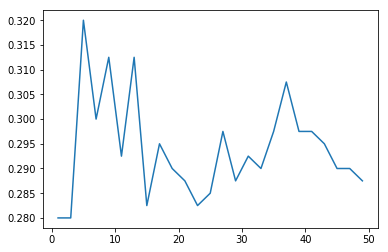

(array([0, 1]),)


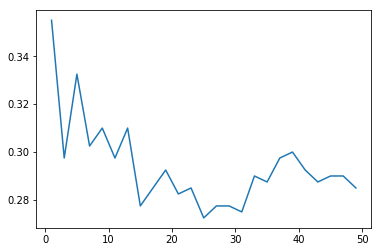

(array([12]),)


In [13]:
print(optimal_K(COUNT))
print(optimal_K(DISTANCE_WEIGHTED))